👥 Customer Segmentation Using Clustering

📌 Problem Statement

The goal of this project is to segment insurance customers into meaningful groups based on their behavior, demographics, and policy usage. These segments help the business design targeted marketing strategies, offer personalized services, and optimize retention.

📂 Dataset Description
Source: Internal / Synthetic / Kaggle-style dataset

Features:

Age, Annual_Income, Policy_Count, Total_Premium_Paid, Claim_Frequency, Policy_Upgrades, etc.

Additional Engineered Features:

Premium_Per_Policy, Claim_to_Income_Ratio, Time_Since_First_Contact, Credit_Score, Discount_Ratio, etc.

Size: 10000 rows and 27 features

⚙️ Tech Stack
Programming Language: Python

Libraries:

Data Handling: Pandas, NumPy

Clustering: Scikit-learn (KMeans, DBSCAN, hdbscan)

Visualization: Matplotlib, Seaborn

Dimensionality Reduction: PCA

Deployment: Streamlit Dashboard

🔄 Workflow
1. Data Preprocessing
Handling missing values

Feature scaling using StandardScaler

Dimensionality reduction for clustering visualization

Outlier detection and removal

2. Exploratory Data Analysis (EDA)
Distribution of customer demographics

Income, premium, and policy usage behavior

Correlation between policy count, upgrades, and claims

Bivariate analysis for behavioral traits

3. Clustering Algorithms
KMeans Clustering

Elbow Method and Silhouette Score to find optimal k

DBSCAN

Density-based segmentation to capture noise/outliers

Dendrogram for visualizing clusters

Compared cluster results with PCA  plots

4. Cluster Profiling
Analyze each cluster based on:

Income, Age, Claim Frequency

Premium Amount, Credit Score

Policy Engagement and Upgrades

Labeled clusters:

"Risky Customers","Low-Risk Profitable Customers","High-Risk / Frequent Claimers"
📈 Results & Insights
Optimal Clusters: 4 (from KMeans)

Top Features Driving Segmentation:

Credit_Score, Time_Since_First_Contact, Claim_Frequency, Policy_Count

Customer Profiles:

Cluster -1: Extremely high values in claims and adjustments. Likely anomalies or risky customers.

Cluster 0: Moderate age, very low claims frequency, many discounts  → Likely safe & profitable customers

Cluster 2: ounger, high claims frequency, low discounts → Possibly risky or cost-intensive customers


📊 Visualizations
Scatter plots of clusters (PCA)

Cluster-wise distribution of income, age, claims

Heatmap of feature contribution

🚀 Future Improvements
Integrate LTV (Lifetime Value) and churn prediction

Real-time customer segmentation dashboard

Use GMM (Gaussian Mixture Model) for soft clustering

Add external behavior data (web activity, contact center logs)

Personalized offer engine based on cluster tag



<h4> Import Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\Dataset\insurance_segmentation_dataset.csv")

In [3]:
df.head(5)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [5]:
df.shape

(10000, 27)

<h3>Exploratory Data Analysis</h3>

In [6]:
df.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,42.131400,47.625000,0.497200,36.780000,-79.860000,2219.571400,0.199900,0.305100,...,30.110000,15.478000,0.576700,5.022900,1.996900,1.996900,46.07320,714.253400,-11.320000,64.325000
std,14.050358,0.365974,42.993376,34.354438,0.716131,65.910288,97.955806,148.521132,0.399945,0.460473,...,33.689782,8.677975,0.494107,2.238231,1.415588,0.817409,45.44845,49.749487,48.704156,39.232618
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,530.000000,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,6.00000,681.000000,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,...,50.000000,16.000000,1.000000,5.000000,2.000000,2.000000,12.00000,715.000000,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2336.000000,0.000000,1.000000,...,50.000000,23.000000,1.000000,6.000000,3.000000,3.000000,99.00000,748.000000,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,2936.000000,1.000000,1.000000,...,150.000000,30.000000,1.000000,16.000000,9.000000,3.000000,99.00000,850.000000,50.000000,100.000000


In [7]:
df.describe(include='object')

,Marital_Status,Prior_Insurance,Claims_Severity,Policy_Type,Source_of_Lead,Region
count,10000,10000,10000,10000,10000,10000
unique,4,3,3,2,3,3
top,Married,1-5 years,Low,Full Coverage,Online,Urban
freq,4899,5257,7003,6007,6035,4921


In [8]:
df.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [9]:
df.duplicated().sum()

0

<h3>Univariate Analysis</h3>

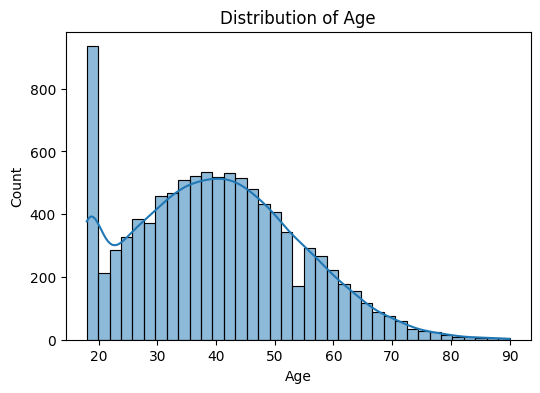

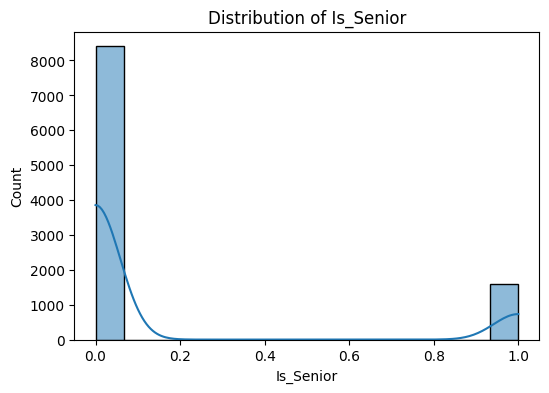

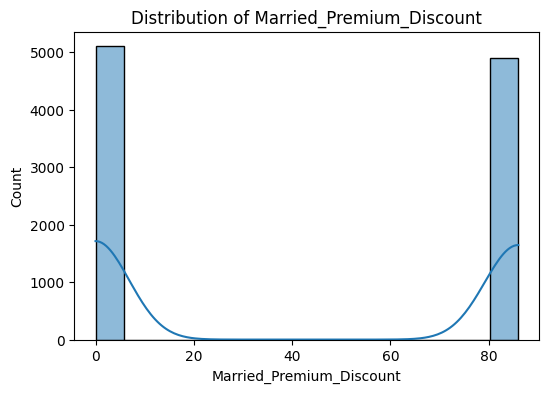

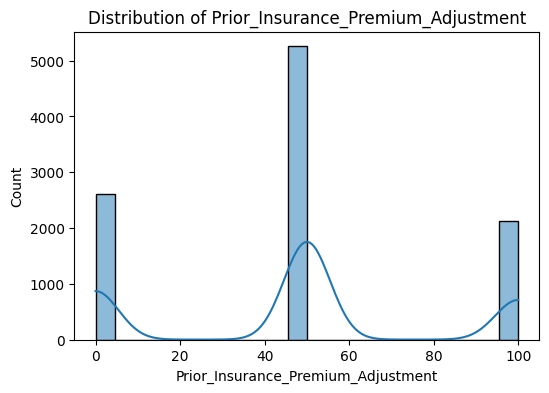

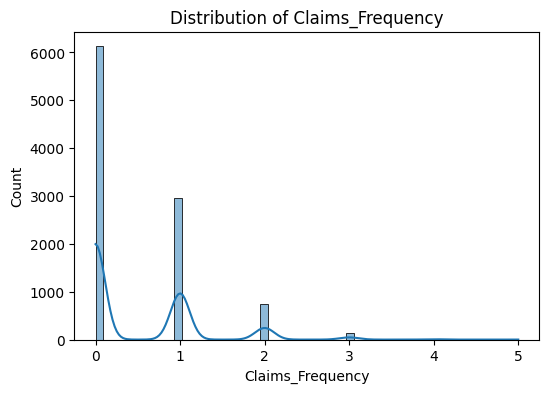

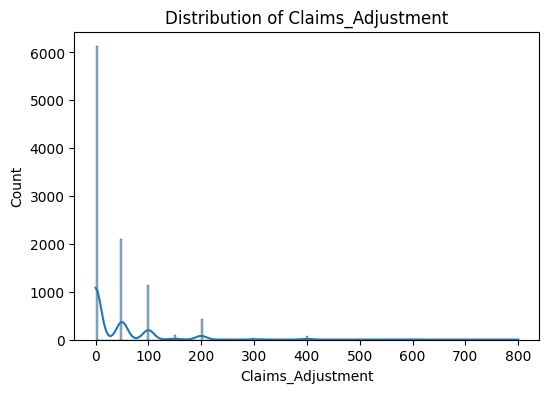

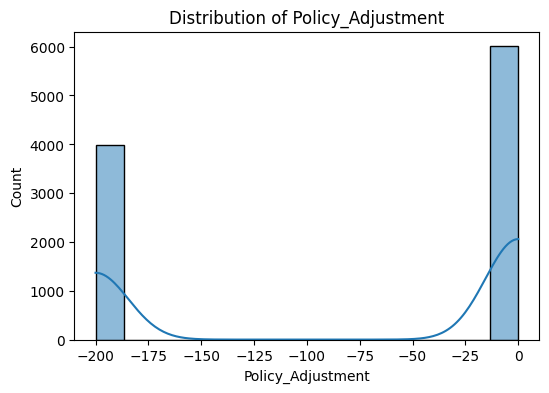

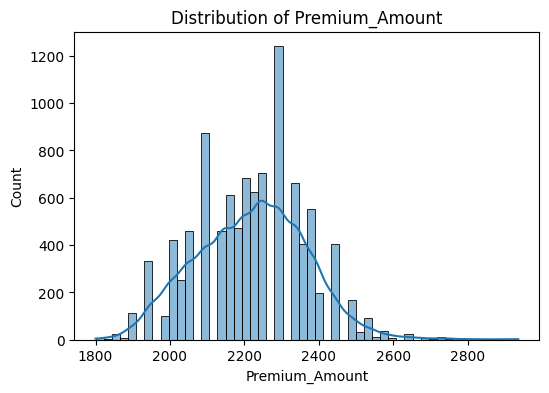

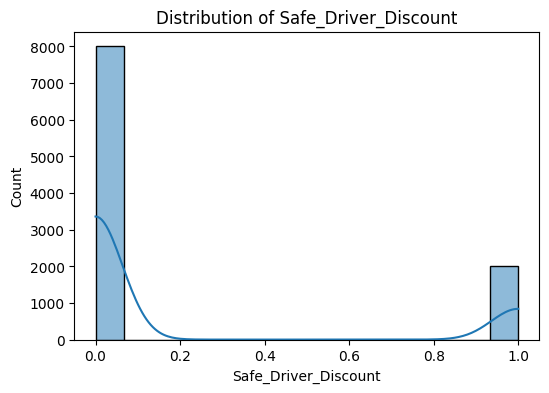

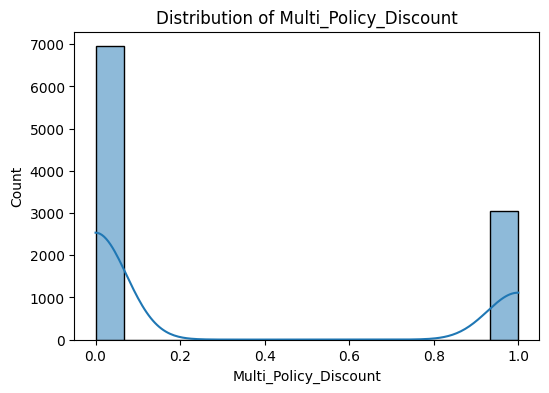

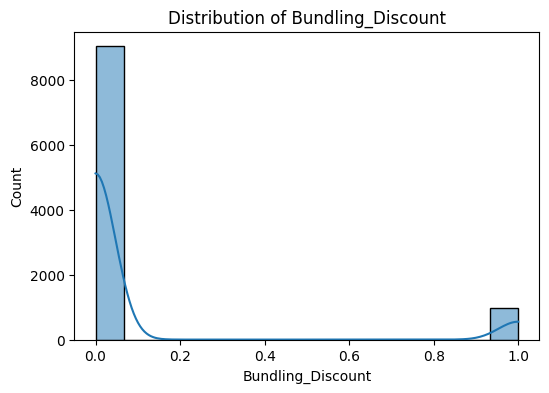

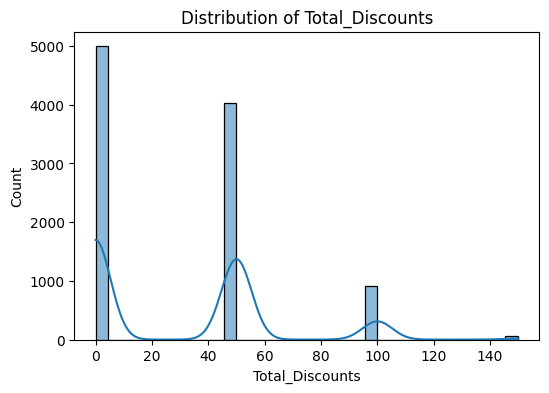

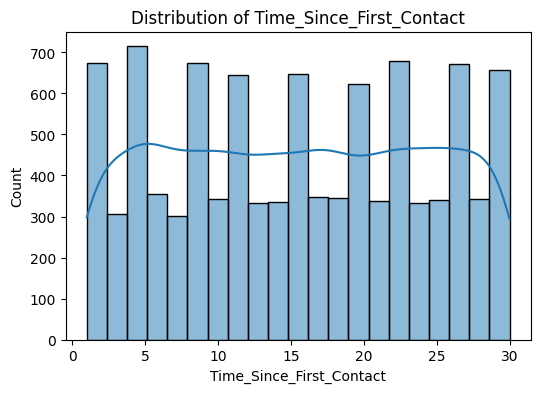

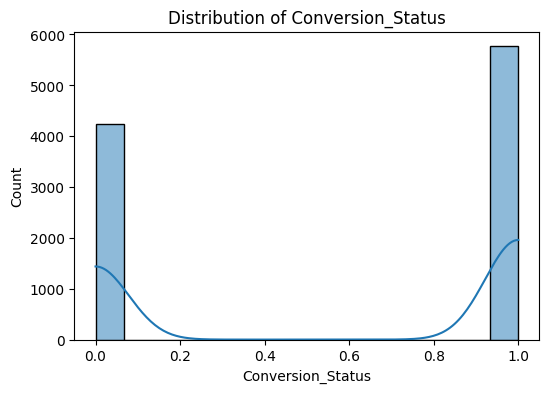

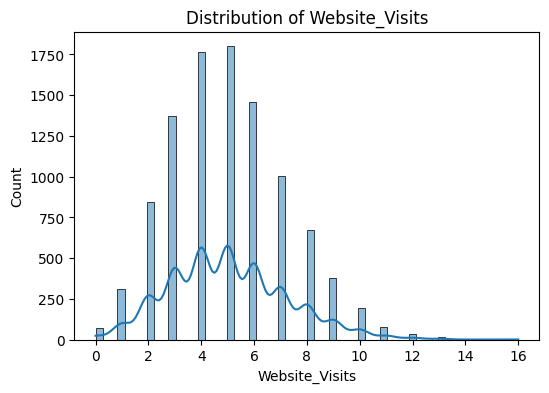

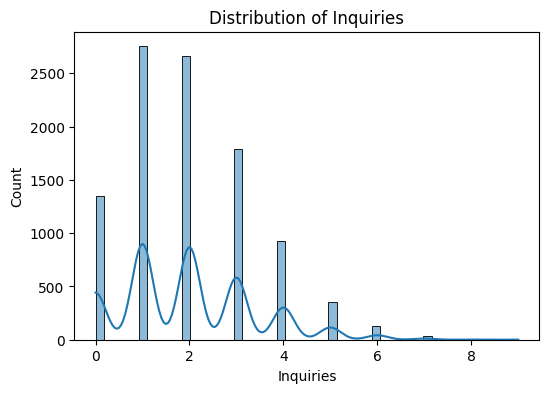

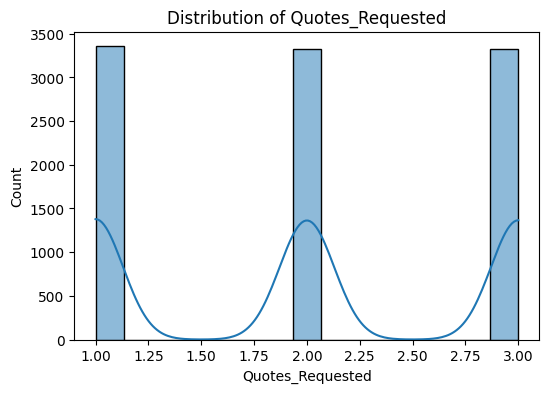

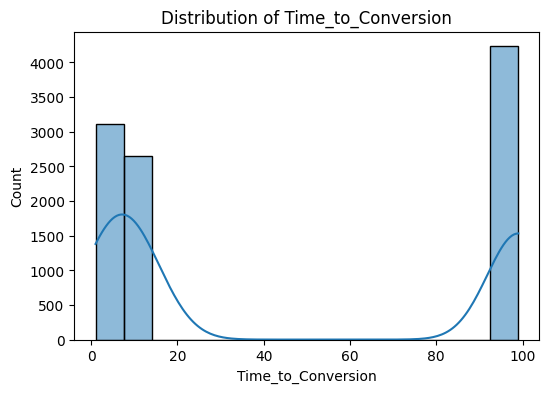

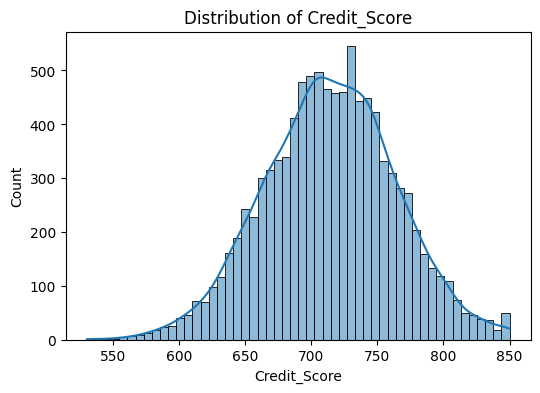

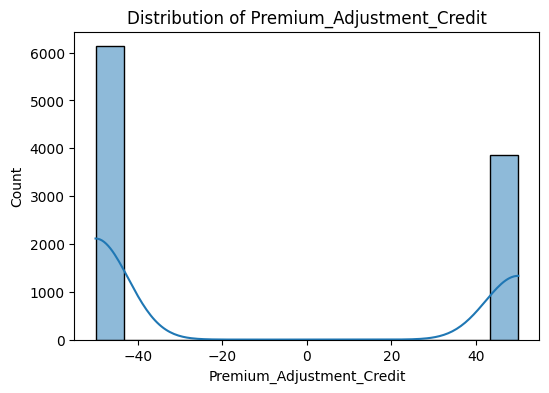

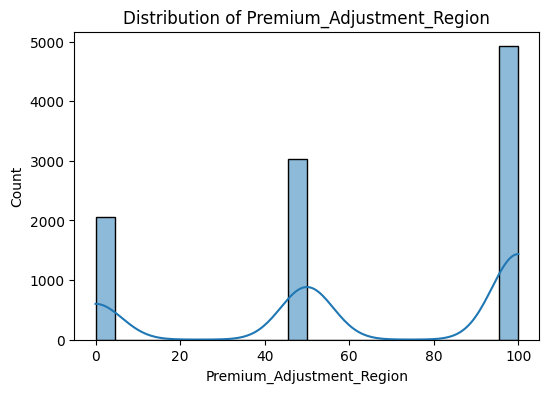

In [10]:
numerical_features = df.select_dtypes(include=['int64']).columns

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<h3>Categorical Variable Distribution</h3>

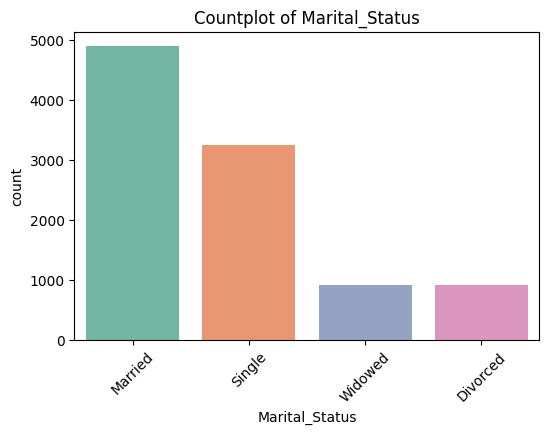

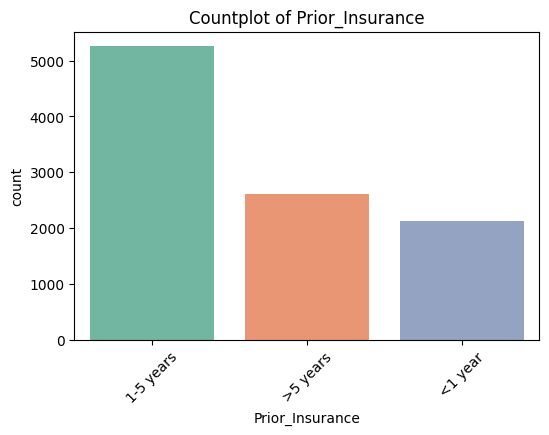

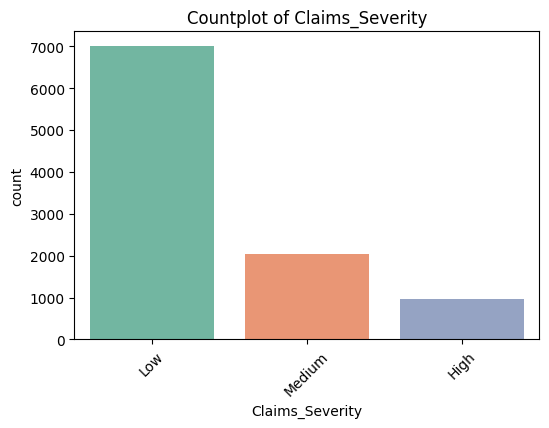

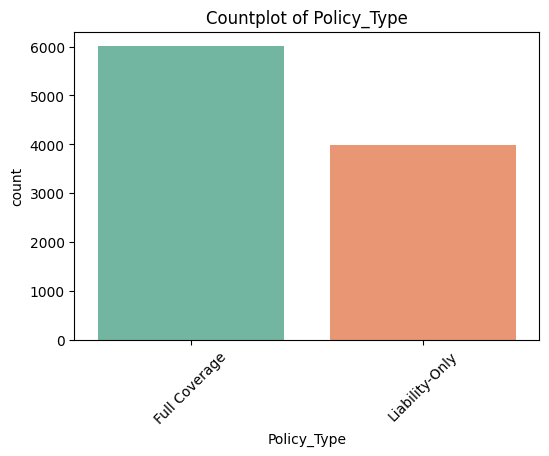

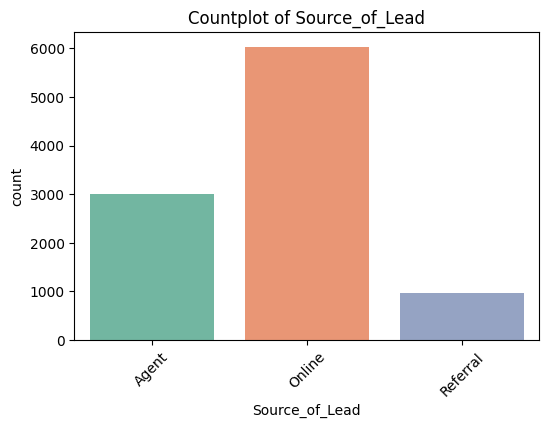

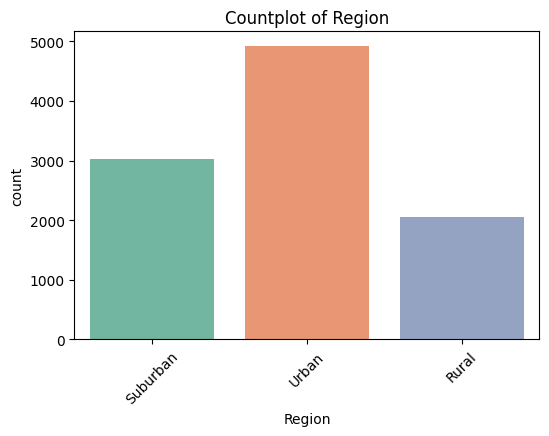

In [11]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
df.columns

Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')

<h3>Corelation Heatmap</h3>

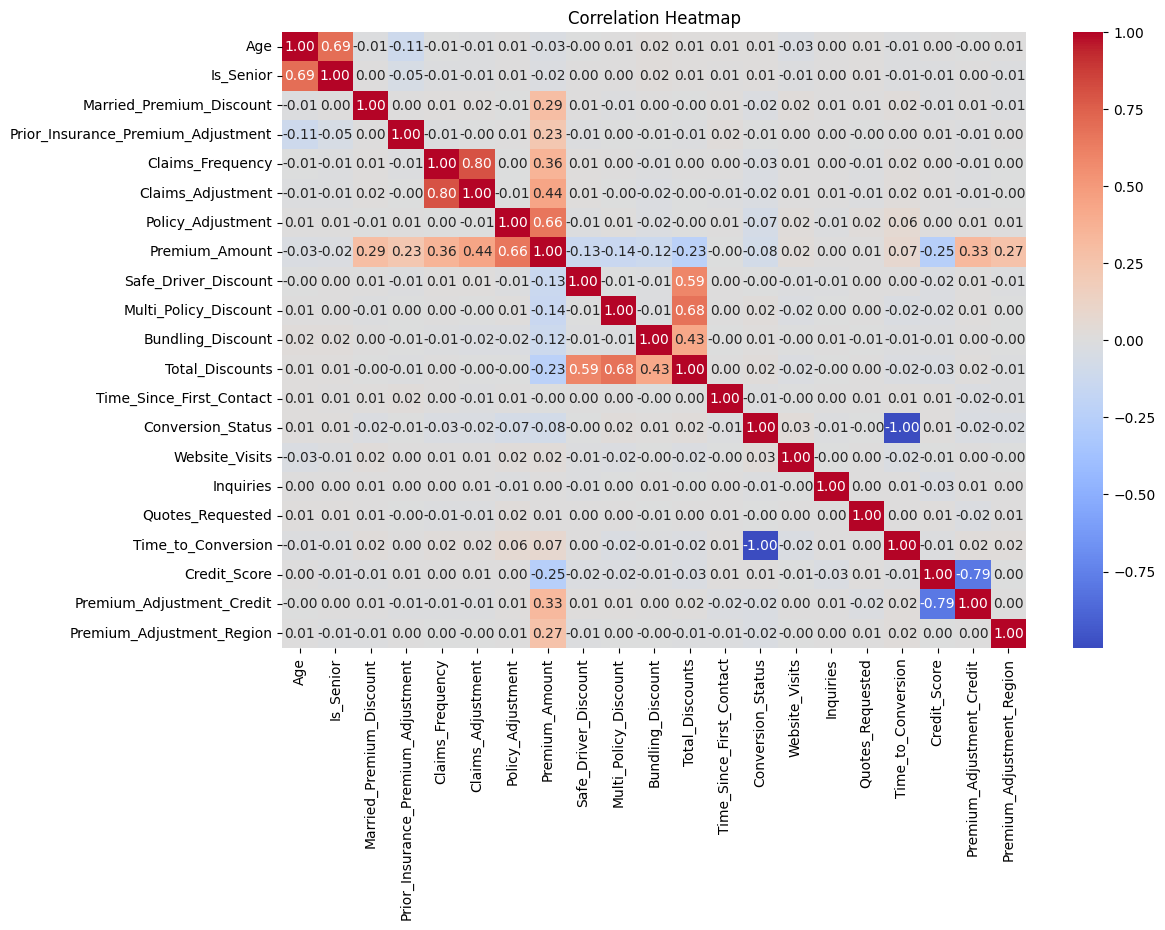

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h4>Pairplot for Clustering Tendencies</h4>

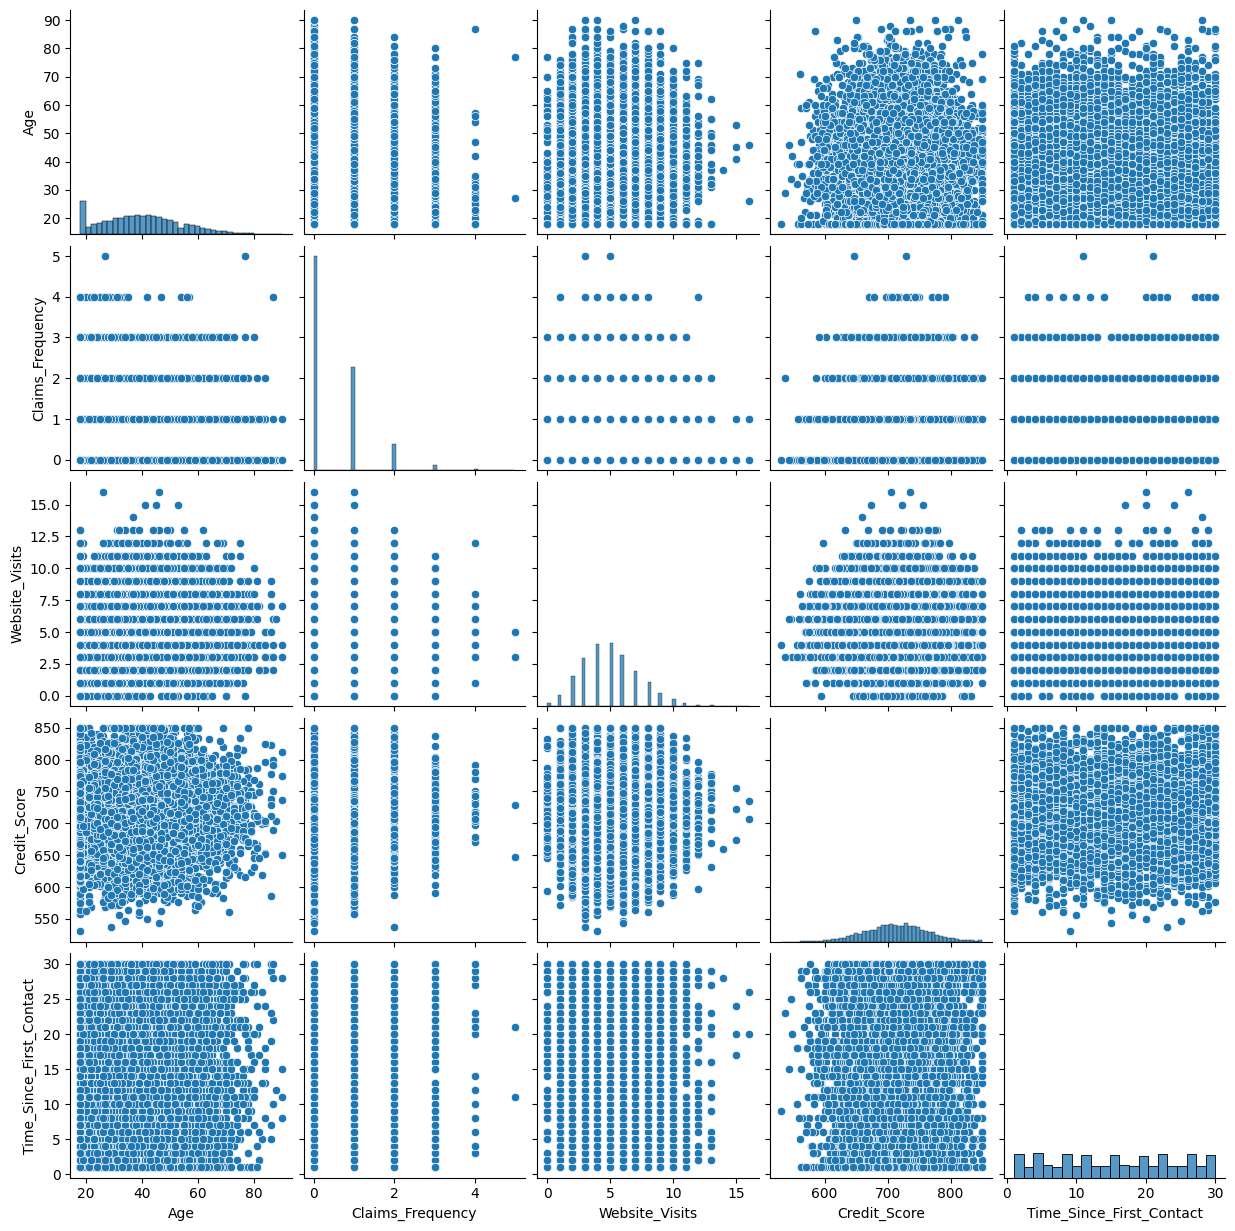

In [14]:
selected = df[['Age', 'Claims_Frequency', 'Website_Visits', 'Credit_Score', 'Time_Since_First_Contact']]
sns.pairplot(selected)
plt.show()

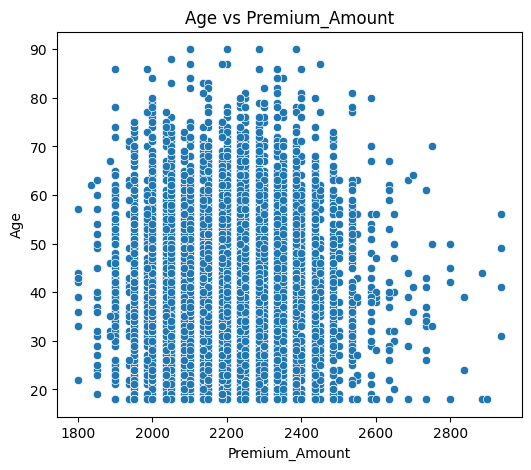

In [15]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,y='Age',x='Premium_Amount')
plt.title('Age vs Premium_Amount')
plt.show()

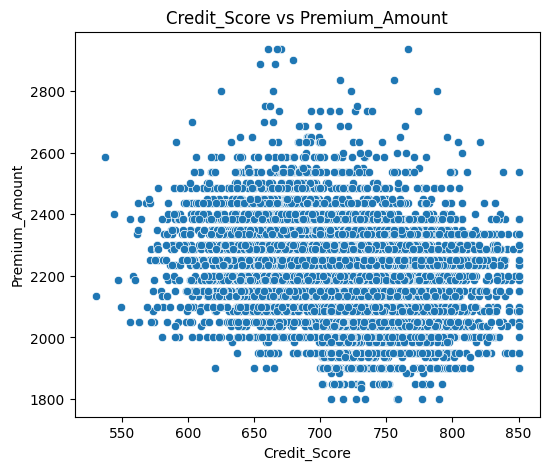

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='Credit_Score',y='Premium_Amount')
plt.title('Credit_Score vs Premium_Amount')
plt.show()

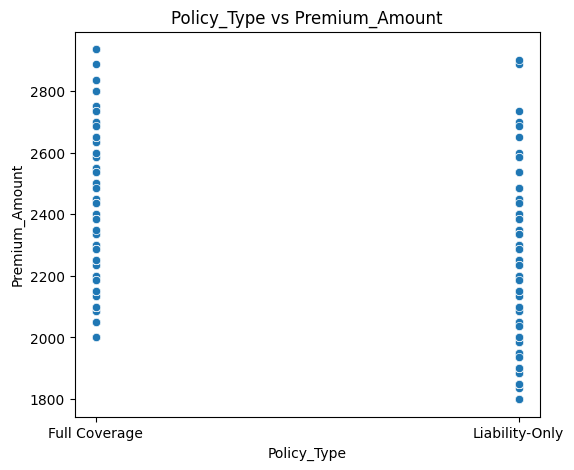

In [17]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='Policy_Type',y='Premium_Amount')
plt.title('Policy_Type vs Premium_Amount')
plt.show()

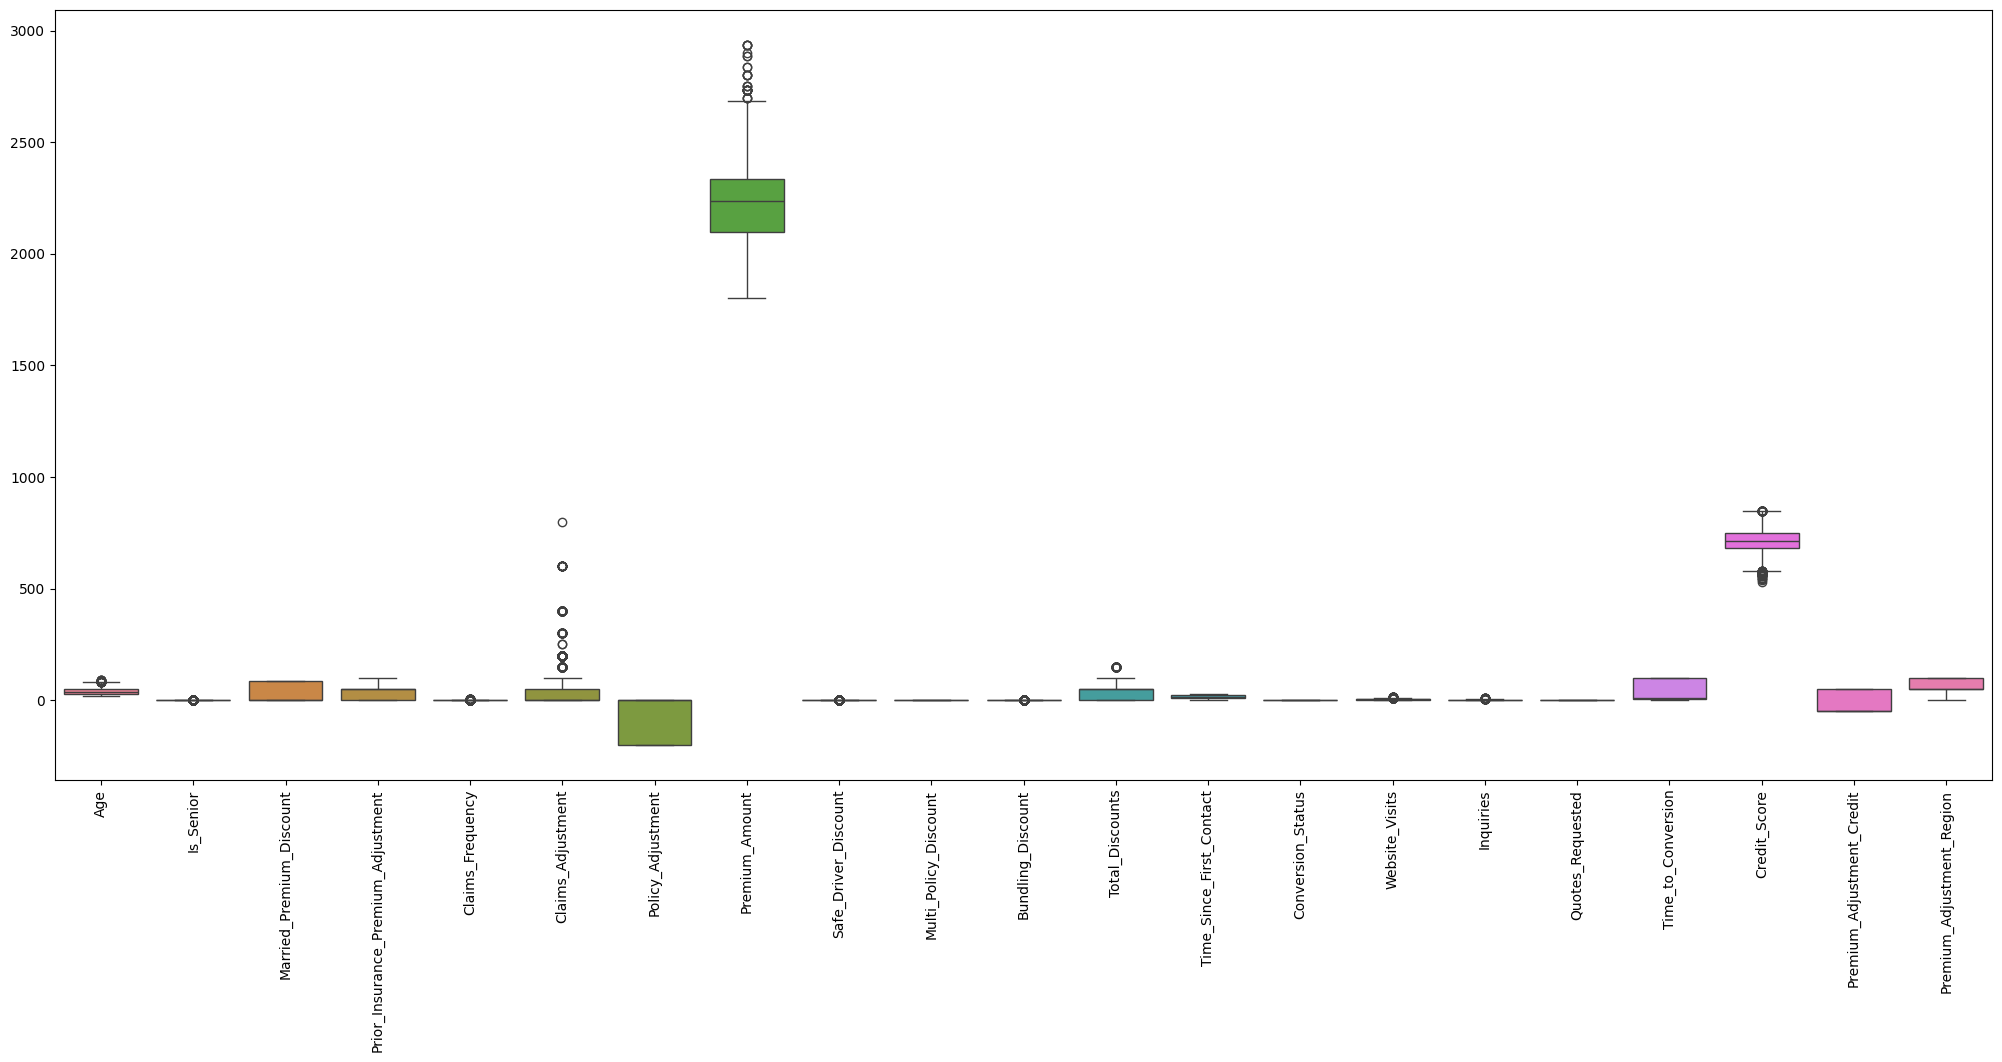

In [19]:
plt.figure(figsize=(25,10))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()


<h4>Key Insights from Boxplot</h4>
Premium_Amount has extreme outliers (values > 2500).

Policy_Adjustment and Claims_Adjustment also show large variance and some strong outliers.

Many other features are well-bounded, but some like Credit_Score and Time_to_Conversion have noticeable spread.

In [20]:
df.shape

(10000, 27)

In [21]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

cols_to_check = ['Premium_Amount', 'Credit_Score', 'Claims_Frequency']
df_no_outliers = remove_outliers_iqr(df, cols_to_check)


In [22]:
df_no_outliers.shape

(9742, 27)

In [23]:
df_no_outliers

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,Single,0,1-5 years,50,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100
9996,18,0,Married,86,1-5 years,50,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100
9997,29,0,Married,86,<1 year,100,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100
9998,47,0,Single,0,<1 year,100,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50


In [24]:
# Step 1: Drop irrelevant identifiers (if any)
df_clean = df.drop(columns=['Customer_ID', 'Name'], errors='ignore')  # adjust if needed

# Step 2: Convert categorical columns to dummy/encoded form
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Step 3: Fill missing values (mean for simplicity, or use other strategies)
df_encoded = df_encoded.fillna(df_encoded.mean(numeric_only=True))

Top Features for Clustering:
 Credit_Score                0.090314
Time_Since_First_Contact    0.089641
Age                         0.088178
Website_Visits              0.082530
Inquiries                   0.075594
Premium_Amount              0.062609
Quotes_Requested            0.050576
Conversion_Status           0.033015
Claims_Adjustment           0.032486
Claims_Frequency            0.031635
dtype: float64


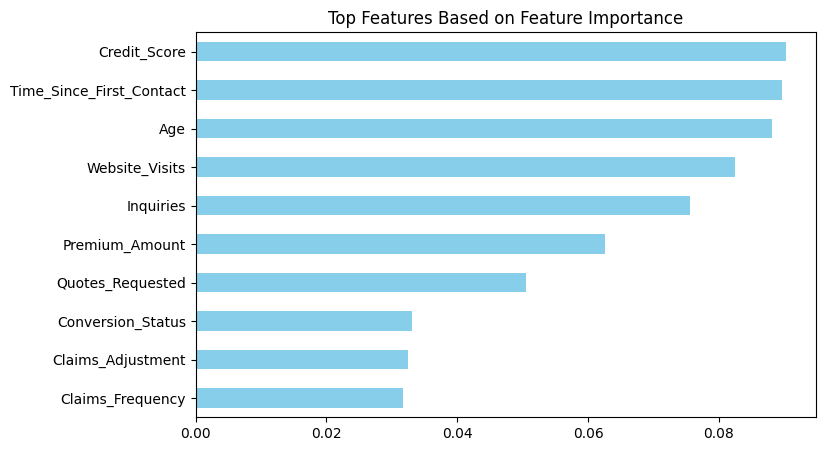

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Drop near-zero variance features
selector = VarianceThreshold(threshold=0.01)  # Change threshold as needed
X_var = selector.fit_transform(df_encoded)  # df_clean = preprocessed DataFrame
selected_columns = df_encoded.columns[selector.get_support()]
df_reduced = df_encoded[selected_columns]

# 2. Drop highly correlated features
corr_matrix = df_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_uncorrelated = df_reduced.drop(columns=to_drop)

# 3. Feature importance using Extra Trees
# Note: Use dummy labels since clustering is unsupervised
dummy_labels = np.random.randint(0, 2, size=len(df_uncorrelated))
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(df_uncorrelated, dummy_labels)

# 4. Top N Features
feat_imp = pd.Series(model.feature_importances_, index=df_uncorrelated.columns)
top_features = feat_imp.sort_values(ascending=False).head(10)
print("Top Features for Clustering:\n", top_features)

# Optional: Plot feature importance
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top Features Based on Feature Importance")
plt.gca().invert_yaxis()
plt.show()

<h3>feature Selection</h3>

In [26]:
top_feature_names = top_features.index.tolist()

In [27]:
top_feature_names

['Credit_Score',
 'Time_Since_First_Contact',
 'Age',
 'Website_Visits',
 'Inquiries',
 'Premium_Amount',
 'Quotes_Requested',
 'Conversion_Status',
 'Claims_Adjustment',
 'Claims_Frequency']

In [28]:

top_feature_names = [col for col in top_feature_names if col in df.columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[top_feature_names])
# Convert scaled array to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df[top_feature_names].columns)


In [29]:
with open("scaler_customer_segmentation.pkl","wb") as file:
    pickle.dump(scaler,file)

In [30]:
df_encoded = pd.get_dummies(df[['Region', 'Policy_Type']], drop_first=True)
df_combined = pd.concat([df_scaled, df_encoded], axis=1)


In [31]:
df_combined.head()

,Credit_Score,Time_Since_First_Contact,Age,Website_Visits,Inquiries,Premium_Amount,Quotes_Requested,Conversion_Status,Claims_Adjustment,Claims_Frequency,Region_Suburban,Region_Urban,Policy_Type_Liability-Only
0,-0.206111,-0.631285,0.498824,-0.010232,-0.704265,0.447289,0.003793,-1.167215,-0.558059,-0.694321,True,False,False
1,0.236127,0.751595,-0.212938,-0.010232,-0.704265,0.783959,0.003793,-1.167215,-0.558059,-0.694321,False,True,False
2,1.160806,1.443036,0.641176,-0.457036,1.415101,1.120628,-1.219647,-1.167215,0.200586,0.702141,False,True,False
3,1.904569,-1.322725,1.566465,0.436572,0.002190,0.783959,0.003793,0.856740,0.200586,0.702141,False,True,False
4,-1.050383,-0.170325,-0.284114,1.330180,1.415101,0.878226,0.003793,0.856740,0.959231,2.098604,True,False,False


<h3>7. PCA - Dimensionality Reduction</h3>

In [32]:
df_combined.dropna(inplace=True)

In [33]:
df_combined.isnull().sum()

Credit_Score                  0
Time_Since_First_Contact      0
Age                           0
Website_Visits                0
Inquiries                     0
Premium_Amount                0
Quotes_Requested              0
Conversion_Status             0
Claims_Adjustment             0
Claims_Frequency              0
Region_Suburban               0
Region_Urban                  0
Policy_Type_Liability-Only    0
dtype: int64

In [34]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_combined)

<h3>7. KMeans Clustering</h3>

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try KMeans with k=2 (you can experiment more)
kmeans = KMeans(n_clusters=2, random_state=42)
pca_labels = kmeans.fit_predict(df_pca)

# Silhouette Score
pca_score = silhouette_score(df_pca, pca_labels)
print(f"Silhouette Score after PCA (k=3): {pca_score:.4f}")


Silhouette Score after PCA (k=3): 0.4401


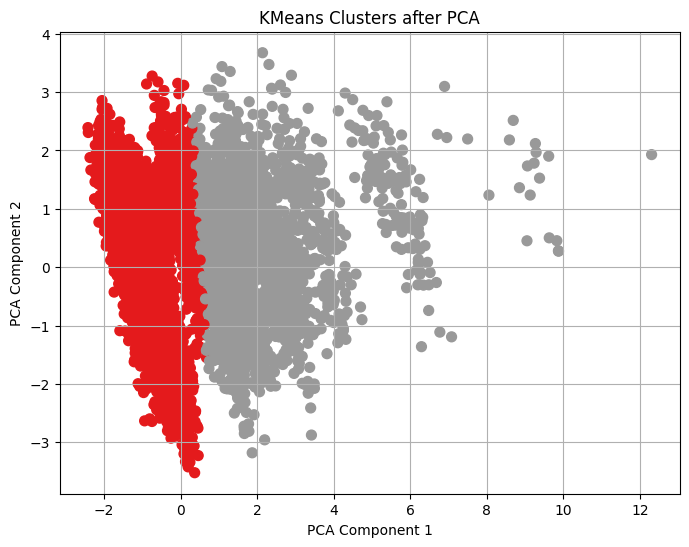

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pca_labels, cmap='Set1', s=50)
plt.title('KMeans Clusters after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

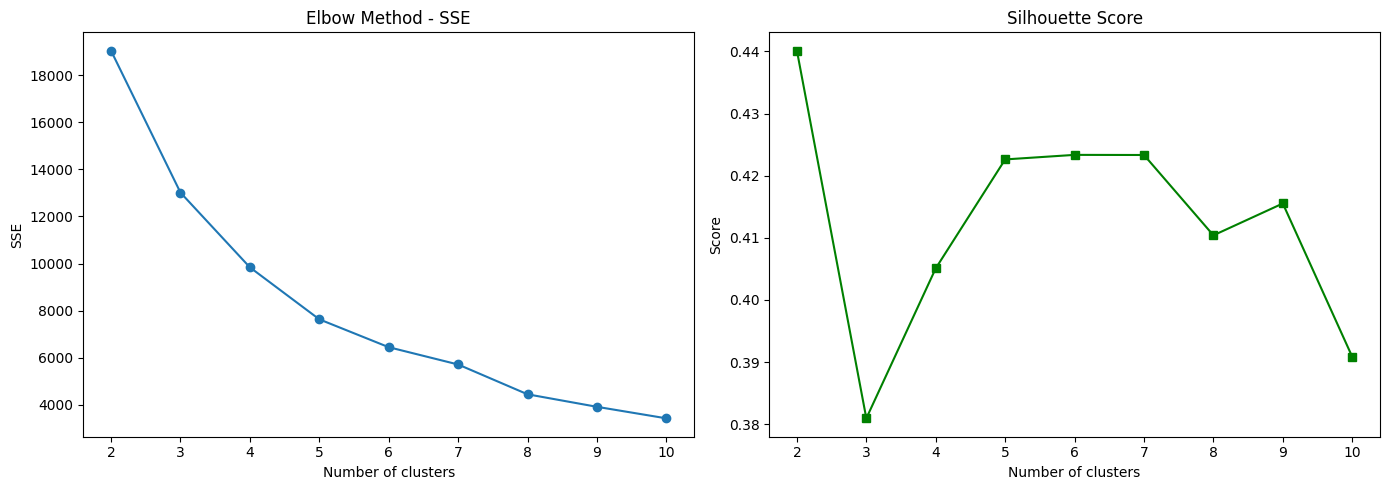

In [37]:
sse = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_pca, labels))

# Plot elbow and silhouette
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title("Elbow Method - SSE")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='s', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

<h3>8. DBScan Clustering</h3>

In [38]:
dbscan = DBSCAN(eps=1, min_samples=5)
db_labels = dbscan.fit_predict(df_pca)

In [39]:
with open ("kmeans_customer_segmentation.pkl","wb") as file:
    pickle.dump(dbscan, file)


In [40]:

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")


Clusters found: 2
Noise points: 1


In [41]:
# Only if there are more than 1 clusters and less noise
if n_clusters > 1:
    score = silhouette_score(df_pca[db_labels != -1], db_labels[db_labels != -1])
    print(f"Silhouette Score (DBSCAN):{score:.4f}")
else:
    print("Cannot compute silhouette score: less than 2 clusters.")


Silhouette Score (DBSCAN):0.7560


In [42]:
db_index = davies_bouldin_score(df_pca[db_labels != -1], db_labels[db_labels != -1])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.2500819284000026


DBI = 0.25 is low, which means:

Your clusters are well-separated.

Each cluster is compact (data points are close to their own centroid).

There’s minimal overlap between clusters.

In [43]:


df_scaled['DBSCAN_Cluster'] = db_labels

# You can also attach labels to the original dataframe if needed
df['DBSCAN_Cluster'] = db_labels


In [44]:
df.head()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region,DBSCAN_Cluster
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,0,5,1,2,99,704,-50,Suburban,50,0
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,0,5,1,2,99,726,-50,Urban,100,0
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,0,4,4,1,99,772,-50,Urban,100,0
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,1,6,2,2,2,809,-50,Urban,100,0
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,1,8,4,2,10,662,50,Suburban,50,0


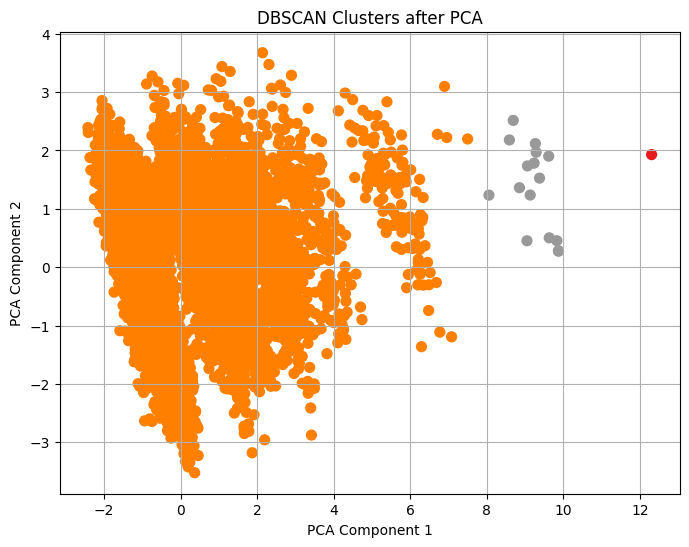

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=db_labels, cmap='Set1', s=50)
plt.title('DBSCAN Clusters after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [46]:
# Only include numeric columns for mean aggregation
numeric_cols = df.select_dtypes(include=['number']).columns

cluster_summary = df.groupby('DBSCAN_Cluster')[numeric_cols].mean().round(2)
print(cluster_summary)

                  Age  Is_Senior  Married_Premium_Discount  \
DBSCAN_Cluster                                               
-1              18.00       0.00                      0.00   
 0              40.00       0.16                     42.12   
 1              35.56       0.12                     53.75   

                Prior_Insurance_Premium_Adjustment  Claims_Frequency  \
DBSCAN_Cluster                                                         
-1                                           50.00              4.00   
 0                                           47.61              0.49   
 1                                           56.25              3.06   

                Claims_Adjustment  Policy_Adjustment  Premium_Amount  \
DBSCAN_Cluster                                                         
-1                         800.00            -200.00         2900.00   
 0                          35.82             -79.86         2218.58   
 1                         587.50       

In [47]:
cluster_labels = {
    -1: "Outliers / Risky Customers",
     0: "Low-Risk Profitable Customers",
     1: "High-Risk / Frequent Claimers"
}

# Apply to your dataframe
df['Cluster_Label'] = df['DBSCAN_Cluster'].map(cluster_labels)

In [48]:
df.head()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region,DBSCAN_Cluster,Cluster_Label
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,5,1,2,99,704,-50,Suburban,50,0,Low-Risk Profitable Customers
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,5,1,2,99,726,-50,Urban,100,0,Low-Risk Profitable Customers
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,4,4,1,99,772,-50,Urban,100,0,Low-Risk Profitable Customers
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,6,2,2,2,809,-50,Urban,100,0,Low-Risk Profitable Customers
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,8,4,2,10,662,50,Suburban,50,0,Low-Risk Profitable Customers


<h3> 8. Save to CSV </h3>

In [49]:
# Save full dataset with cluster labels
df.to_csv("clustered_data_with_dbscan.csv", index=False)

In [50]:
import pandas as pd

# Convert to DataFrame if needed
if not isinstance(df_pca, pd.DataFrame):
    df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])



In [51]:
import hdbscan
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assume df_pca is your PCA-transformed data (or you can use X_scaled)
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)  # You can tune this
labels = clusterer.fit_predict(df_pca)

# Add cluster labels to your DataFrame if needed
df_pca_with_labels = df_pca.copy()
df_pca_with_labels['Cluster'] = labels

# Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

# Silhouette Score (excluding noise)
if n_clusters > 1:
    score = silhouette_score(df_pca[labels != -1], labels[labels != -1])
    print(f"Silhouette Score (HDBSCAN): {score:.4f}")
else:
    print("Silhouette Score not available — less than 2 clusters.")


Clusters found: 20
Noise points: 1942
Silhouette Score (HDBSCAN): 0.0010
